In [1]:
import pandas as pd
df = pd.read_csv('data/8M_IL_pred.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Normalized SMILES,MP/K,MP/K_STD,GTT/K,GTT/K_STD,TDT/K,TDT/K_STD,C,...,V_STD,ST,ST_STD,R_STD,CO2,CO2_STD,HC,HC_STD,CO2_328,CO2_STD_328
0,0,0,CC(=O)[O-].C[N+]1(C)CCCCCC1,366.5,9.990,192.9,3.475,470.5,11.020,4.445,...,0.2950,38.00,1.1950,0.003220,-3.758,0.2477,6.010,0.04916,-4.100,0.2268
1,1,1,CCC(=O)[O-].C[N+]1(C)CCCCCC1,355.2,9.000,197.8,4.660,461.0,12.375,4.270,...,0.2966,36.30,0.8550,0.002674,-3.768,0.2842,6.062,0.04224,-4.105,0.2654
2,2,2,CCCC(=O)[O-].C[N+]1(C)CCCCCC1,341.8,9.340,207.9,4.770,473.0,14.710,3.920,...,0.2942,34.80,0.7495,0.002466,-3.744,0.2952,6.125,0.03310,-4.080,0.2740
3,3,3,CCCCC(=O)[O-].C[N+]1(C)CCCCCC1,351.8,10.810,207.8,4.453,477.5,12.490,4.040,...,0.2073,33.56,0.7150,0.002815,-3.703,0.3080,6.195,0.03232,-4.035,0.2834
4,4,4,CCCCCC(=O)[O-].C[N+]1(C)CCCCCC1,347.2,7.656,216.4,4.492,482.0,10.780,3.760,...,0.3318,32.38,0.8496,0.002708,-3.630,0.3180,6.297,0.03098,-3.959,0.2950


In [2]:
filtered_df = df[(df['MP/K'] < 298) & (df['TDT/K'] > 400) & (df['C'] > 3) & (df['V'] < 4.6)&(df['EC'] > 0)]
len(filtered_df)

175

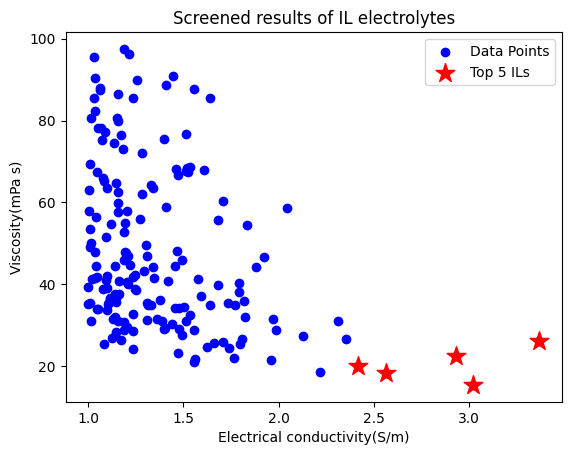

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

A = filtered_df['EC']
B = filtered_df['V']

x = np.exp(A)
y = np.exp(B)

top_5_indices = np.argsort(x)[-5:]
plt.scatter(x, y, label="Data Points", color='blue')
plt.scatter(x.iloc[top_5_indices], y.iloc[top_5_indices], color='red', marker='*', s=200, label="Top 5 ILs")

plt.title('Screened results of IL electrolytes')
plt.xlabel('Electrical conductivity(S/m)')
plt.ylabel('Viscosity(mPa s)')

plt.grid(False)  
plt.legend()  
plt.show()


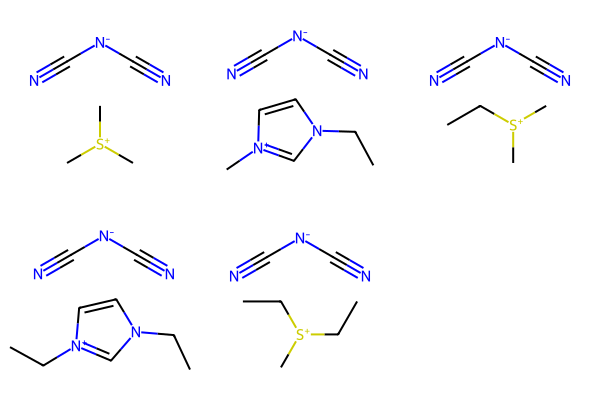

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw

top_5_df = filtered_df.nlargest(5, 'EC')
smiles_list = top_5_df['Normalized SMILES'].drop_duplicates()
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if smiles]
img = Draw.MolsToGridImage(molecules, molsPerRow=3, subImgSize=(200, 200))
img
